### Fraudential_Transaction
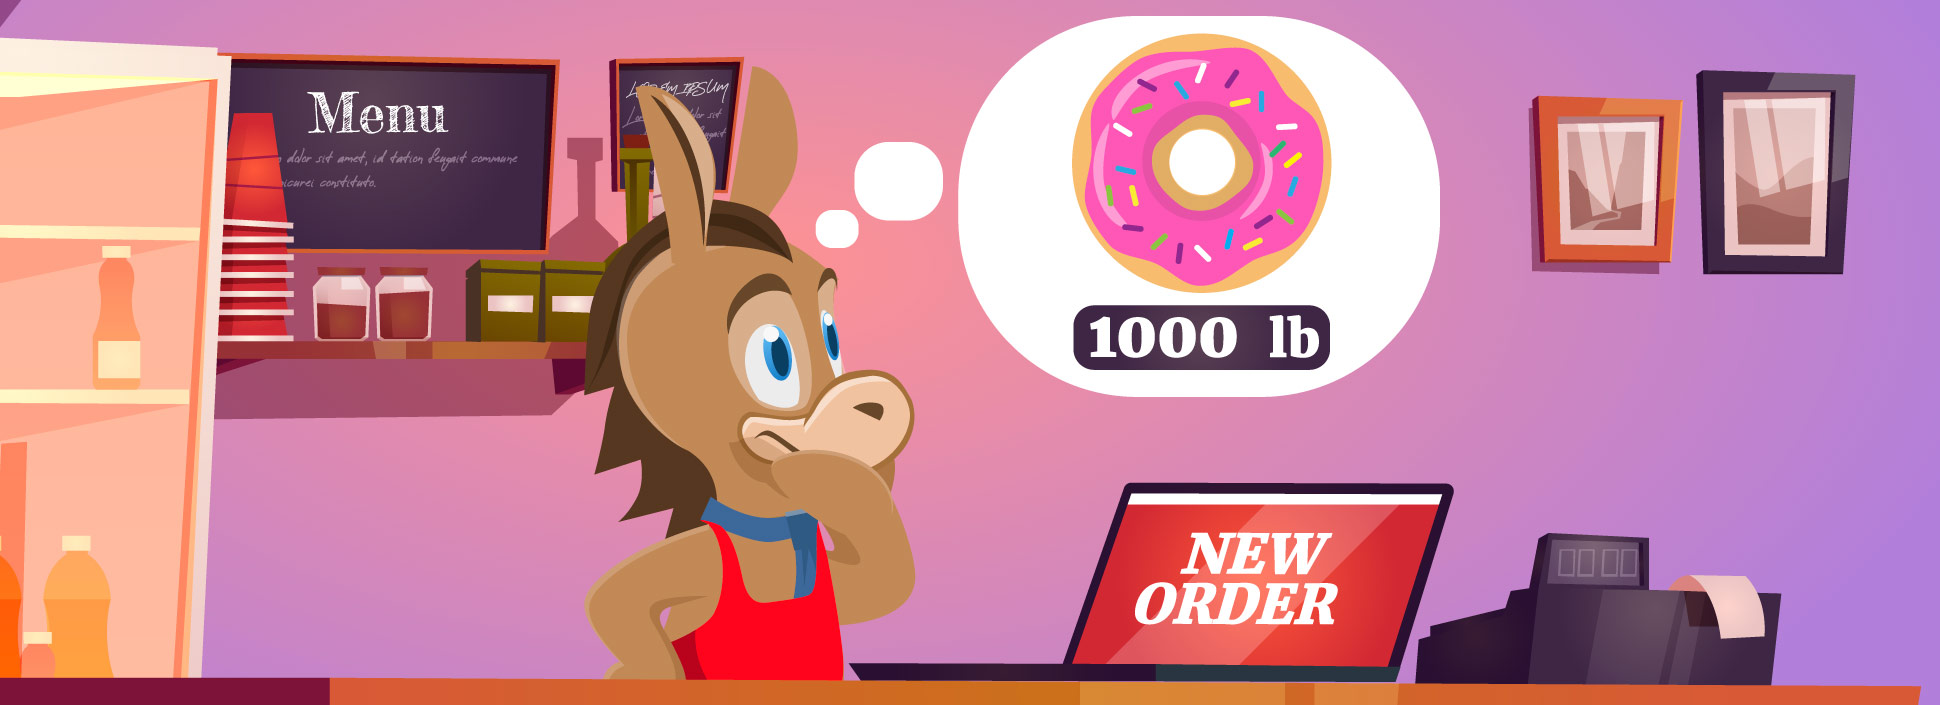

### Data_directory
- **step**: Represents a unit of time in the real world, where each step corresponds to one hour of time. The simulation spans a total of 744 steps, equivalent to 30 days.
- **type**: Describes the type of transaction, which can be one of the following categories: CASH-IN, CASH-OUT, DEBIT, PAYMENT, or TRANSFER.
- **amount**: Refers to the transaction amount in the local currency.
- **nameOrig**: Indicates the customer who initiated the transaction.
- **oldbalanceOrg**: Denotes the initial balance of the customer's account before the transaction took place.
- **newbalanceOrig**: Represents the new balance of the customer's account after the transaction has been processed.
- **nameDest**: Represents the recipient customer of the transaction.
- **oldbalanceDest**: Represents the initial balance of the recipient's account before the transaction. It's important to note that information is not available for customers whose names start with 'M', indicating they are merchants.
- **newbalanceDest**: Indicates the new balance of the recipient's account after the transaction. As with 'oldbalanceDest', there is no information for customers whose names start with 'M' (merchants).
- **isFraud**: Indicates whether the transaction was conducted by fraudulent agents within the simulation. In this dataset, the fraudulent behavior of these agents aims to gain profit by taking control of customers' accounts and attempting to empty the funds by transferring them to another account and subsequently cashing out of the system.
- **isFlaggedFraud**: The business model incorporates a mechanism to detect and flag suspicious activity involving large transfers between accounts. In this dataset, an illegal attempt is identified when an individual transaction exceeds $200,000.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Reading the data from file

In [2]:
data=pd.read_csv('Fraud.csv')

### Understanding & Preparing the data

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

### Selecting the sample
 - since we have large amount of data so we choose a small set of data  (25% data) 

In [8]:
dataSample = data.sample(n=1590655, random_state=0)

### checking for outliers

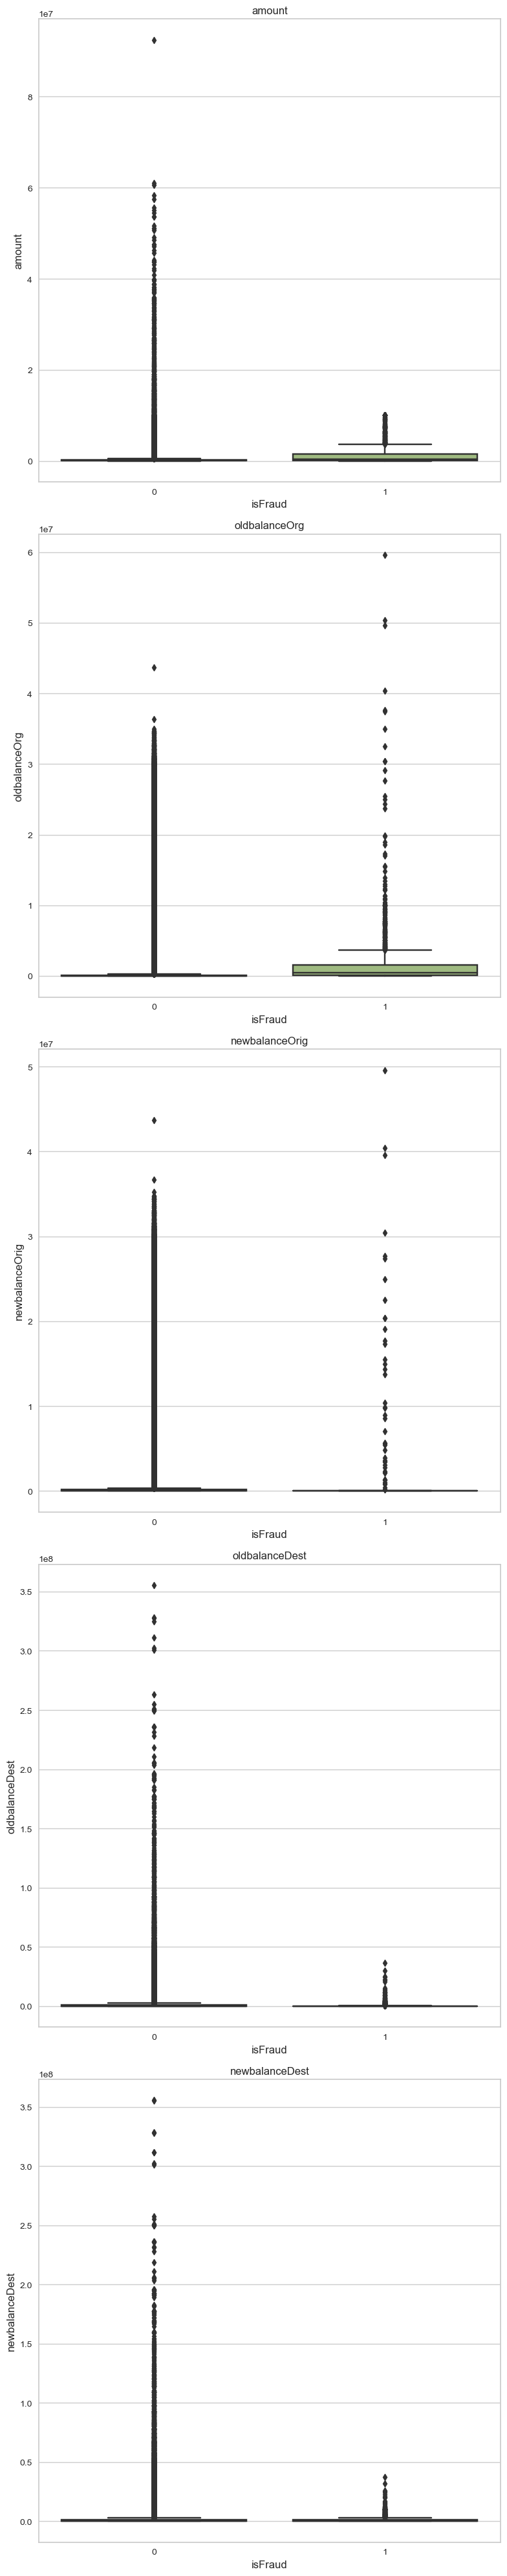

In [9]:
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
fig, ax = plt.subplots(len(numerical_columns), 1, figsize=(8, 8 * len(numerical_columns)))
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=dataSample['isFraud'], y=dataSample[column], ax=ax[i])
    ax[i].set_title(column, size=12)
plt.tight_layout()
plt.show()

### checking for null values

In [10]:
dataSample.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### checking multicollinearity

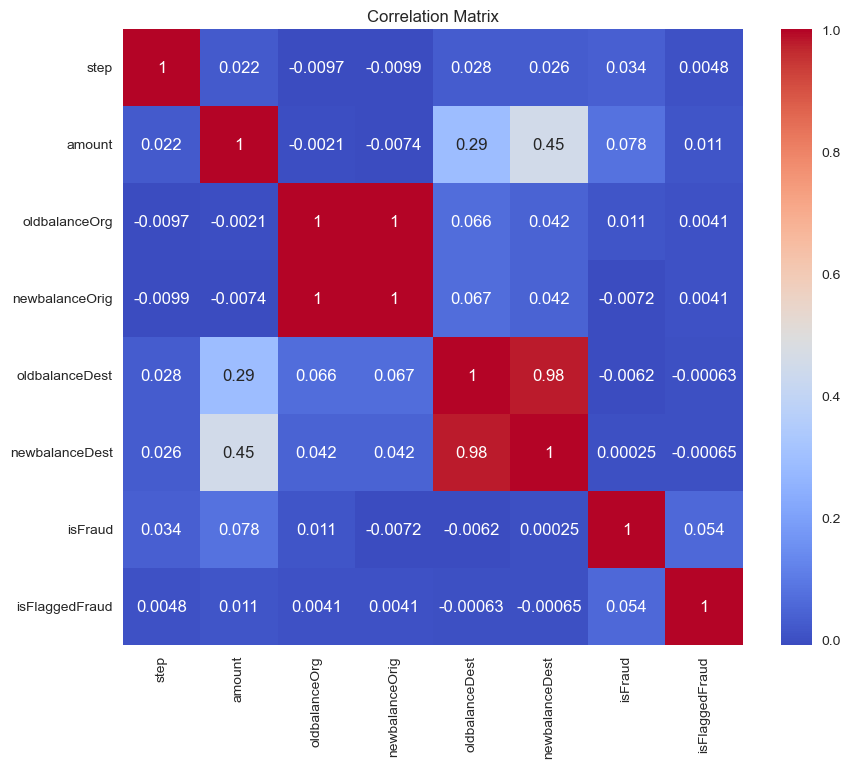

In [11]:
correlation_matrix = dataSample.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Analysis  --> Plotting the graphs

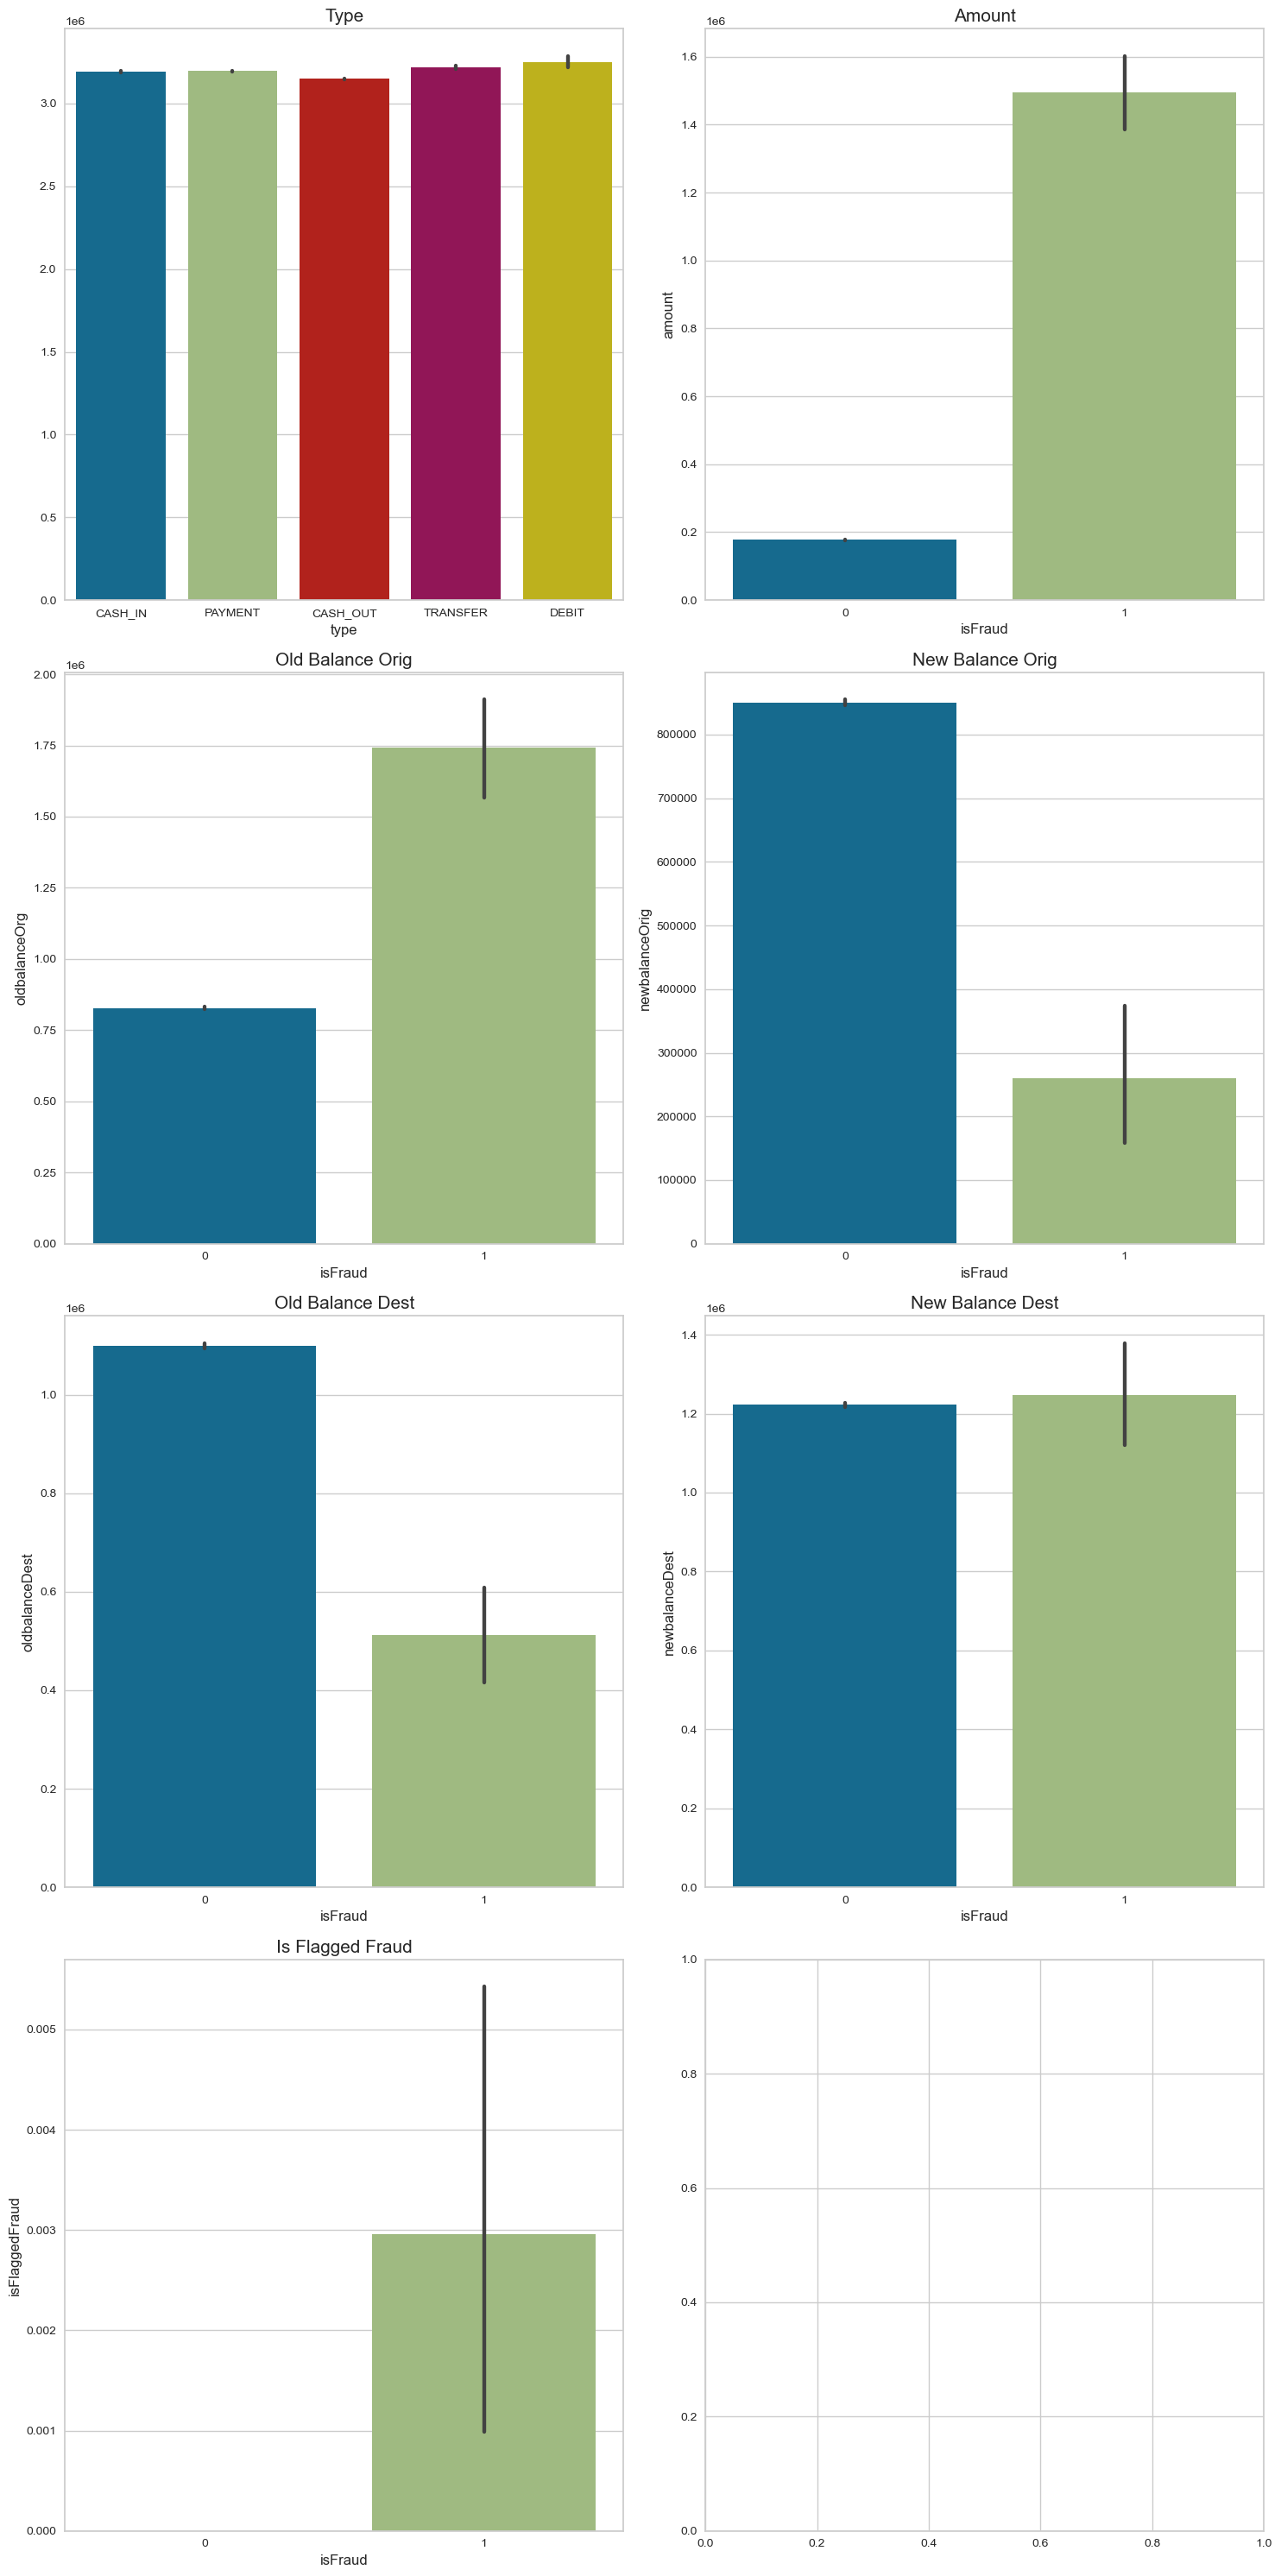

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))
sns.barplot(x=dataSample['type'], y=dataSample.index, ax=ax[0][0])
ax[0][0].set_title('Type', size=15)
sns.barplot(x=dataSample['isFraud'], y=data['amount'], ax=ax[0][1])
ax[0][1].set_title('Amount', size=15)
sns.barplot(x=dataSample['isFraud'], y=data['oldbalanceOrg'], ax=ax[1][0])
ax[1][0].set_title('Old Balance Orig', size=15)
sns.barplot(x=dataSample['isFraud'], y=data['newbalanceOrig'], ax=ax[1][1])
ax[1][1].set_title('New Balance Orig', size=15)
sns.barplot(x=dataSample['isFraud'], y=data['oldbalanceDest'], ax=ax[2][0])
ax[2][0].set_title('Old Balance Dest', size=15)
sns.barplot(x=dataSample['isFraud'], y=data['newbalanceDest'], ax=ax[2][1])
ax[2][1].set_title('New Balance Dest', size=15)
sns.barplot(x=dataSample['isFraud'], y=data['isFlaggedFraud'], ax=ax[3][0])
ax[3][0].set_title('Is Flagged Fraud', size=15)
plt.tight_layout()
plt.show()

### Simplifying the Dataset

In [13]:
df = dataSample.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1)

### Splitting the data into training and testing

In [14]:
df_train, df_test = train_test_split(df, random_state =100 , test_size = 0.3)

### Creating the xgboost model

In [15]:
setup_df = setup(data= df_train, target = 'isFraud', 
                session_id=100, data_split_stratify=True, 
                 remove_outliers=True)

,Description,Value
0,Session id,100
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(1113458, 7)"
4,Transformed data shape,"(1074487, 11)"
5,Transformed train set shape,"(740449, 11)"
6,Transformed test set shape,"(334038, 11)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [16]:
xgb = create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9996,0.9997,0.7600,0.9383,0.8398,0.8396,0.8443
1,0.9996,0.9998,0.7200,0.9351,0.8136,0.8134,0.8203
2,0.9996,0.9936,0.7426,0.9259,0.8242,0.8240,0.8290
3,0.9997,0.9999,0.8218,0.9326,0.8737,0.8735,0.8753
4,0.9996,0.9998,0.7624,0.9390,0.8415,0.8413,0.8459
5,0.9997,0.9996,0.7921,0.9639,0.8696,0.8694,0.8736
6,0.9996,0.9949,0.7426,0.9740,0.8427,0.8425,0.8503
7,0.9997,0.9972,0.7822,0.9753,0.8681,0.8680,0.8733
8,0.9997,0.9901,0.8515,0.9149,0.8821,0.8819,0.8825


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Creating prediction model

In [17]:
pred = predict_model(xgb, data=df_test)
pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9996,0.9996,0.7479,0.9482,0.8362,0.8360,0.8419


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,prediction_label,prediction_score
2580246,CASH_OUT,108099.492188,442.0000,0.000,0.000000e+00,1.080995e+05,0,0,1.0
1696897,CASH_OUT,231773.296875,0.0000,0.000,3.749513e+05,6.067246e+05,0,0,1.0
4934354,PAYMENT,21631.740234,283449.0000,261817.250,0.000000e+00,0.000000e+00,0,0,1.0
631384,CASH_OUT,320722.781250,0.0000,0.000,4.442569e+05,9.944981e+05,0,0,1.0
1730668,CASH_OUT,276264.281250,992955.9375,716691.625,6.187473e+06,6.463738e+06,0,0,1.0


### Accuracy score of the model

In [18]:
accuracy_score(pred['isFraud'], pred['prediction_label'])

0.9996395618581005

### Using KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [21]:
df_train, df_test = train_test_split(df, random_state=100, test_size=0.3)

In [22]:
X_train = df_train.drop('isFraud', axis=1)
y_train = df_train['isFraud']
X_test = df_test.drop('isFraud', axis=1)
y_test = df_test['isFraud']

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
predictions = knn.predict(X_test)

In [26]:
accuracy_score(y_test, predictions)

0.9994216225164869

### Q&A

1. Data cleaning including missing values, outliers and multi-collinearity. 
	- Data cleaning: No missing values or outliers detected in the dataset. 
2. Describe your fraud detection model in elaboration. 
	- The fraud detection model is created using the PyCaret library and XGBoost classifier.
3. How did you select variables to be included in the model?
	- Variable selection: Variables related to transaction type, amount, balance, and fraud are included.
4. Demonstrate the performance of the model by using best set of tools. 
	- Model performance: The model achieves a high accuracy of 99.96% using the XGBoost classifier.
5. What are the key factors that predict fraudulent customer? 
	- Key factors predicting fraud: The type of transaction, amount, and balance in specific accounts are crucial factors.
6. Do these factors make sense? If yes, How? If not, How not? 
	- These factors make sense as they align with common patterns associated with fraudulent activities.
7. What kind of prevention should be adopted while company update its infrastructure?
	- Prevention measures during infrastructure updates: Enhance authentication, real-time monitoring, and anomaly detection.
8. Assuming these actions have been implemented, how would you determine if they work?
	- Determining effectiveness: Evaluate performance metrics like detection rate, false positives, and business impact reduction.